# Programming Lab II

## Handout 3

Miguel A. Ibarra-Arellano  
ibarrarellano@gmail.com

### Exercise 1 : *"Matrices as lists of lists"*

The previously mentioned solution for initializing matrices as lists of lists works fine. Now,  
consider the following modification, which tries to optimize setting up the matrix by initial-  
izing a single row of n 0’s only once and append this row m times:

In [1]:
# Stablish values for n and m
n=3
m=3
row = [0]*n
mat = []
for i in range(m):
    mat.append(row)
mat[1][1] = 1
print(mat)

# Another way to initialize it (shorter)
mat2 = [[0]*n]*m
mat2[1][1] = 1
print(mat2)

# Ok, it is pretty obvious why this is wrong, every time that you are doing anything
# to any column you will be doing it to all the other columns! because the "row" 
# it's the same object over and over again.

[[0, 1, 0], [0, 1, 0], [0, 1, 0]]
[[0, 1, 0], [0, 1, 0], [0, 1, 0]]


### Exercise 2: *"The Dotplot matrix"*

#### a) *Generate a dotplot matrix*

In [8]:
 import numpy as np

def dotplot(seqA, seqB, w=1,s=1):
    """
    Generates a dotplot matrix for 2 given strings

    :param seqA: Str A
    :param seqB: Str B
    :param w: int window size
    :param s: int stringency
    :param heading: heading of the file
    :param filename: filename to output the doplot matrix
    :return: 
    """
    # Create empty matrix
    dp = np.zeros((len(seqA),len(seqB)),dtype=int)
    
    # Calcualte window distance
    dis = (w-1)//2
    
    # Lets fill every single point in the matrix
    for i in range(dis,len(seqA)-dis): # Rows
        for j in range(dis,len(seqB)-dis): # Columns
            subsA = seqA[i-dis:i+dis+1]
            subsB = seqB[j-dis:j+dis+1]
            
            
            # Check every element of the substring for stringency
            n_matches = 0
            for k in range(min(len(subsA),len(subsB))):
                if subsA[k] == subsB[k]:
                    n_matches += 1
                    
            # if the number of matches is bigger than the stringency then put a 1
            #print(n_matches,s)
            if n_matches >= s:
                dp[i, j] = 1
    return (dp)

# Now let's test this
#seqA = "ABRACADABRACADABRA"
#seqB = "ABRACADABRACADABRA"
#dp_test = dotplot(seqA, seqB, w=1, s=1)

seqA="peter piper picked a peck of pickled peppers"
seqB="a peck of pickled peppers peter piper picked"
dp_peter = dotplot(seqA, seqB, w=5, s=3)
print(dp_peter)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### b) *The Dotplot as ASCII art*

In [9]:
def dotplot2ascii(dp,seqA,seqB,heading="dotplot",filename="dotplot.txt"):
    """
    Takes a dotplor matrix and otuputs an ASCII version of it 
    to a file.
    
    :param dp: dotplot matrix
    :param seqA: string A
    :param seqB: string B
    :param heading: heading
    :param filename: filename
    :return: file with an ASCII art plot matrix
    """
    with open(filename,"w") as OUT:
        print(heading, file=OUT)
        print("  |", "".join(list(seqB)), file=OUT)
        print("--|", "".join(list("-")*len(seqB)), file=OUT)
        for i,l in zip(range(len(seqA)),seqA):
            print("{0} |".format(l), "".join(["*" if i == 1 else " " for i in dp[i]]), file=OUT)


dotplot2ascii(dp_peter, seqA, seqB, "Peter Piper’s first dotplot", "mydotplot.txt")

#### c) *Graphical output using matplotlib*


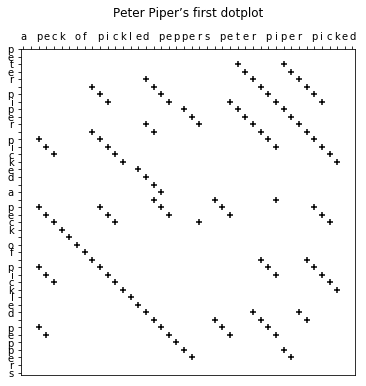

In [10]:
# Imports
%matplotlib inline
from scipy import ndimage
import matplotlib.pylab as plt


def dotplot2graphics(dp, hdA, hdB, heading="dotplot", filename="my_dotplot.pdf", use_imshow=False):
    """
    Prints dotplot with matplotlib
    
    :param dp: dotplot matrix
    :param hdA: string A
    :param hdB: string B
    :param heading:  heading
    :param filename: output filename
    :return: file with a dotplot matrix
    """
    
    fig, ax = plt.subplots(1,1, figsize=(6, 6))
    
    if use_imshow:
        ax.imshow(dp)
    else:
        for i in range(len(seqA)):
            for j in range(len(seqB)):
                if dp[i,j] == 1:
                    ax.scatter(j, i, color="black", marker="+")
    
        # Invert axis
        plt.gca().invert_yaxis()
    
    # Mover xticks to top
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    # Set xticks to letters
    plt.xticks(np.arange(len(hdB)), list(hdB))
    plt.yticks(np.arange(len(hdA)), list(hdA))
    
    # Set title
    plt.title(heading, y=1.08)
    
    # Save figure
    plt.savefig(filename)
    
    
dotplot2graphics(dp_peter, seqA, seqB, "Peter Piper’s first dotplot", "mydotplot.pdf")#, use_imshow=True)

### Exercise 3: *"The Icosian Game"*

In [ ]:
def get_paths():
    pass